# BCS105E/MIS550E - Data Science Final Project

## New York City Taxi Rides - 2013

In this project your team is given two datasets with data from approximately 170,000 taxi rides in NYC in the year 2013. This is just a fraction of the original dataset, which contains over 173 Million rides.You can read more about this datset here: https://chriswhong.com/open-data/foil_nyc_taxi/

Your task in this project is to join, clean, transform, explore, analyze this dataset to create at least one baseline model to predict something about the tip of new rides based on some of the provided features. For example, you can try to predict if a ride will generate a tip or not, if the tip will be good or bad (define good or bad), if a tip will be above average, etc. You can pick and choose as many features (columns) you wish to include in the model. The goal is to achieve the best possible prediction power from the dataset.

In this notebook you must create at least one predictive model using any algorithm you want as long as you explain why you chose it and what are you expecting to get from it.

You also must make at least one attempt to improve the model by changing the algorithm, the features, the hyperparameters or any other aspect capable of improving the prediction power of the model.

Your team must turn this notebook in no later than December 2nd, 2022 at 23:59. No late submission will be accepted. The late subission policy will not apply to this assignment and failure to meet this deadline will imply failing the course.

This notebook will be worth 200 points if all aspects of the Data Science pipeline are performed correctly. Among all the teams, the one with the higher overall model improvement will be awarded 50 extra points. This will be calculated by the % of improvement between the score of the baseline model and the best one after tuning/improvement.

On December 7th, each team will have 15 minutes to present the project in class. The presentation will be worth 50 points. The presentation must cover the steps taken in this notebook, such as how the data was cleaned and transformed, the choices made, the hypothesis, the model initial results and the overall result of the model after tuning/improving it. The proesention should not be about code, but about analysis and results: what you had, what you did, why, and what you achieved.

The sections below will serve only as a guide for the main steps you need to follow. You can create and use as many cells for you Python code as you want in this section.

It's likely that you will need a couple of consultations with the professor.
Start working on this project as soon as possible and plan your work so you won't be at any risk of not be able to finish it in time.

# Section 1) Data Ingestion - 20 Points

Look for the files designated for your team in the class Google drive. You need to merge them in Python or SQL and get the full dataset loaded here as a Pandas data frame.

At the end of this section you must have a Pandas data frame with around 170,000 rows and 21 columns to ear the points of this section.

**To earn all the points in this section you must:**
 * Have both files (fare and trips) joined in one single file by the appropriated columns and loaded in this notebook


In [3]:
#Write here how many rows and columns your dataset has at this stage.

import pandas as pd

# Load the fare dataset
fare_df = pd.read_csv('fare.csv')

# Load the trips dataset
trips_df = pd.read_csv('trips.csv')

# Merge the two datasets on the appropriate columns
# Assuming 'trip_id' is a common column in both datasets
print(trips_df.columns)
print(fare_df.columns)

# Define the columns to merge on
merge_columns = ['medallion', 'hack_license', 'pickup_datetime']

# Merge the datasets
merged_df = pd.merge(trips_df, fare_df, on=merge_columns)

# Check the number of rows and columns in the merged dataset
print("Number of rows:", len(merged_df))
print("Number of columns:", len(merged_df.columns))

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')
Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')
Number of rows: 173865
Number of columns: 22


In [ ]:
#Start writing your code here:

# Section 2) Data Cleaning and Transformation - 50 Points

In this section you need to inspect, clean and transform your data frame. Start by running some descriptive statistics, look for missing values (NANs), duplicates, capitalization issues, extra spaces on strings, etc. Fix the issues using the techniques demonstrated in class (slides, notebooks).

At the end of this section you must have a cleaned dataset ready to start analysis to earn the points of this section.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Inspect each column of the dataset
 * Identify any inconsistencies in the data (There are at least 5).
 * Fix the inconsitencies
 * Explain why/how you are fixing fixing the inconsistencies
 * Create new features that you bealive will be helpful to make predictions


In [6]:
#Write here how many rows and columns your dataset has at this stage.
print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 173865.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 173865
Number of columns: 22


                          medallion                      hack_license   
0  D1F475F4E336BF3B6242C5D94E915A69  7CB4DCE3A893B8439AC21BD94E6BEDF5  \
1  AE6723199069D150D19811415EAB6EC3  C3CB80B3EED0CF101B027ADEC9FEFF64   
2  D9C7383A9DE84857B6CBE4D9F14A3861  9687310DB0703E669E9170E4A4A6B049   
3  4A0AB544BFDDFA79246AD552FFC54CE1  4E8DB60933B0D85B594D8C765935E68A   
4  C98ABD996F7028EE2CDE0C2A95666559  1F84144447A9154760C1D6B486F0E915   

  vendor_id_x  rate_code store_and_fwd_flag           pickup_datetime   
0         CMT          1                  Y  2013-01-05T10:28:04.000Z  \
1         CMT          1                  N  2013-02-13T03:24:53.000Z   
2         CMT          2                  N  2013-02-23T10:24:07.000Z   
3         CMT          1                  Y  2013-01-12T13:14:37.000Z   
4         CMT          1                  N  2013-07-02T00:38:25.000Z   

           dropoff_datetime  passenger_count  trip_time_in_secs   
0  2013-01-05T11:06:16.000Z                1           

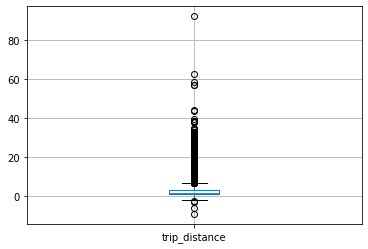

medallion              object
hack_license           object
vendor_id_x            object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
vendor_id_y            object
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object


In [31]:
import pandas as pd

# Load the dataset
df = merged_df

# Inspect the first few rows
print(df.head())
print(df.isnull().sum())

import matplotlib.pyplot as plt

# Example: Box plot for 'trip_distance'
df.boxplot(column=['trip_distance'])
plt.show()

print(df.dtypes)
# Example: Fill missing values in 'trip_distance' with the median
df['trip_distance'].fillna(df['trip_distance'].median(), inplace=True)

# Example: Cap 'trip_distance' outliers at the 99th percentile
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
df['trip_distance'] = df['trip_distance'].apply(lambda x: Q3 + 1.5 * IQR if x > Q3 + 1.5 * IQR else x)

# Example: Convert 'trip_distance' to float
df['trip_distance'] = df['trip_distance'].astype(float)

# Example: Create a 'time_of_day' feature
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['time_of_day'] = df['hour'].apply(lambda x: 'morning' if 6 <= x < 12 else 'afternoon' if 12 <= x < 18 else 'evening' if 18 <= x < 24 else 'night')

# Example: Create an interaction feature between 'trip_distance' and 'fare_amount'
df['distance_fare_ratio'] = df['trip_distance'] / df['fare_amount']

In [10]:
print(merged_df.head())
print(merged_df.isnull().sum())
print(merged_df.dtypes)


# Example: Drop rows with any missing values
merged_df = merged_df.dropna()

# Example: Fill missing values in 'trip_distance' with the median
merged_df['trip_distance'].fillna(merged_df['trip_distance'].median(), inplace=True)

# Checking for duplicates and removing them if any
duplicate_rows = merged_df[merged_df.duplicated()]
if not duplicate_rows.empty:
    merged_df = merged_df.drop_duplicates()
else:
    print("No duplicate rows found.")
    

# Example: Convert 'trip_distance' to float
merged_df['trip_distance'] = merged_df['trip_distance'].astype(float)

# Check the first few rows of the cleaned dataset
print(merged_df.head())

# Check for missing values and duplicates again
print(merged_df.isnull().sum())
print(merged_df.duplicated().sum())

# Saving the cleaned dataset to a new CSV file
# cleaned_data_path = os.path.join('cleaned_data.csv')
# merged_df.to_csv(cleaned_data_path, index=False)
# print("\nData has been saved in 'cleaned_data.csv'.")

                          medallion                      hack_license   
0  D1F475F4E336BF3B6242C5D94E915A69  7CB4DCE3A893B8439AC21BD94E6BEDF5  \
1  AE6723199069D150D19811415EAB6EC3  C3CB80B3EED0CF101B027ADEC9FEFF64   
2  D9C7383A9DE84857B6CBE4D9F14A3861  9687310DB0703E669E9170E4A4A6B049   
3  4A0AB544BFDDFA79246AD552FFC54CE1  4E8DB60933B0D85B594D8C765935E68A   
4  C98ABD996F7028EE2CDE0C2A95666559  1F84144447A9154760C1D6B486F0E915   

  vendor_id_x  rate_code store_and_fwd_flag           pickup_datetime   
0         CMT          1                  Y  2013-01-05T10:28:04.000Z  \
1         CMT          1                  N  2013-02-13T03:24:53.000Z   
2         CMT          2                  N  2013-02-23T10:24:07.000Z   
3         CMT          1                  Y  2013-01-12T13:14:37.000Z   
4         CMT          1                  N  2013-07-02T00:38:25.000Z   

           dropoff_datetime  passenger_count  trip_time_in_secs   
0  2013-01-05T11:06:16.000Z                1           

# Section 3) Data Analysis - 50 Points

In this section, explore your transformed data frame. Create plots (histograms, categorical variable counts, etc,), check correlations between features (columns) and the target variable, check for multi-colinearity.

At the end of this section you must have your data frame ready for modeling according to the hypothesis you want to test to earn the points of this sections. You must explain your hypothesis in terms of which features (columns) you chose, which ones you discarded, what is your target variable and what you are trying to predict.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Analyze how each feature in the dataset may or may not be correlated to what you are trying to predict
 * Decide with features you are keeping in the model and which you are dropping
 * CLEARLY EXPLAIN your theory, which means, why do you think the features your are keeping the the model will be helpful and why the one you are dropping will not.



In [12]:
#Write here how many rows and columns your dataset has at this stage.

print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 86763.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 86763
Number of columns: 22


In [13]:
print(merged_df.describe())

          rate_code  passenger_count  trip_time_in_secs  trip_distance   
count  86763.000000     86763.000000       8.676300e+04   86763.000000  \
mean       1.033182         1.290043       8.492203e+02       2.867707   
std        0.266531         1.454765       2.059913e+04       3.402650   
min        0.000000         0.000000       0.000000e+00      -9.200000   
25%        1.000000         1.000000       3.690000e+02       1.000000   
50%        1.000000         1.000000       6.080000e+02       1.800000   
75%        1.000000         1.000000       9.670000e+02       3.200000   
max        6.000000       300.000000       4.291088e+06      92.100000   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude   
count      86763.000000     86763.000000       86763.000000      86763.000000  \
mean         -72.741763        40.070806         -72.719332         40.059620   
std            9.473468         5.218761           9.553885          5.263807   
min      

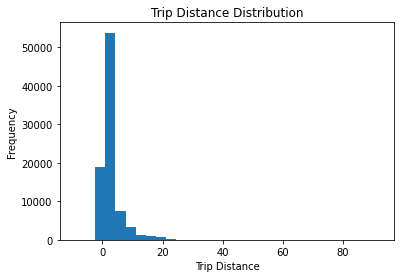

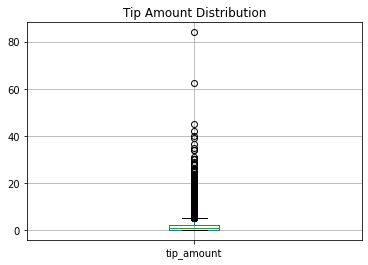

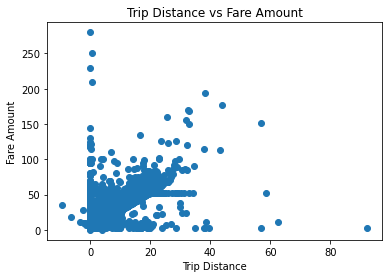

In [19]:
import matplotlib.pyplot as plt

# Example: Histogram of 'trip_distance'
plt.hist(merged_df['trip_distance'], bins=30)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot of 'tip_amount'
merged_df.boxplot(column=['tip_amount'])
plt.title('Tip Amount Distribution')
plt.show()

# Example: Scatter plot of 'trip_distance' vs 'fare_amount'
plt.scatter(merged_df['trip_distance'], merged_df['fare_amount'])
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# import seaborn as sns

# # Correlation matrix
# corr_matrix = merged_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# Section 4) Modeling and evaluation: Baseline model - 50 Points

In this section you must perform all the actions necessary for creating a predictive model with Machine Learning. These actions include, but are not limited to, selecting an algorithm, split your data frame in train and test subsets, train the model, select the evaluation metric, make predictions and evaluate the model.

The earn the points in this section you must be able to fit a model, make predictions and evaluate the model using a metric that you have selected.

**To earn all the points in this section you must:**
 * Create a model by importing, instantiating and fitting one of the algorithms studied in the class.
 * Use the model to make prediction on unseen data (y_train)
 * Compare the predictions with the known labels (y_test) and evaluate the model using the appropriated metrics. This will be your baseline model.
 * Provide the correct interpretation on the metric. Is the model performing well? how well? why?




In [20]:
#Write here how many rows and columns your dataset has at this stage.

print("Number of rows:", merged_df.shape[0]) 
#The number of rows in the dataframe is 86763.

print("Number of columns:", merged_df.shape[1]) 
#The number of columns in the dataframe is 22.

Number of rows: 86763
Number of columns: 22


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'tip_amount' is your target variable
# and 'merged_df' is your cleaned and transformed DataFrame
# Assuming the column causing the issue is named 'column_name'
X = merged_df.drop(['tip_amount', 'hack_license'], axis=1)
y = merged_df['tip_amount'] # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

ValueError: could not convert string to float: '402F9D0572FB6BA987A0BD7A0D256E24'

# Section 5) Model improvement and tuning - 30 Points

In this section you must improve the reults of your baseline model. Try adding/removing features, changing hyperparameters, grid search, ensembles, cross-validation, etc. Compare the performance of this improved model with the previous one using the same metric. Explain your your results and conclusions.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Improve your baseline model by applying at least one of the techniques studied in class (different algorith, different features, Hyperparameter tuning, Cross Validation, GridSearchCV, etc)
 * Evaluate the performace of the new model using the appropriated metric and compare it with the baseline model.
 * Provide the correct interpretation on the two metrics. Which model is performing better? how much better? why?

In [ ]:
#Write here how many rows and columns your dataset has at this stage.

In [ ]:
#Start writing your code here: